# Exploratory Data analysis

**Defining The Question**


we have been tasked to understand electric car usage of the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

**Specifying  the question**

The claim is that the choosen postal codes differences of blue cars in mean is 0 

**Metrics of success**

b) Defining the Metric for Success

Introduce the data you will be describing and the random variable that you are investigating.

State the null and alternate hypothesis that you will be testing.

Provide some explanation for why this hypothesis is important and/or interesting.

Areas to be covered to achieve the question objectives:

1) Exploratory Data Analysis


1.   Univariate analysis
2.   Bivariate analysis



2)Hypothesis testing

**Understanding the context**

The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging).
The datasets are "/content/autolib_daily_events_postal_code (1).csv" and "/content/columns_explanation (1).xlsx"

In [0]:
# loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn_pandas
#Import scipy libraries
from scipy import stats

from scipy.stats import norm

from scipy.stats import t

from scipy.stats import ttest_ind

from statsmodels.stats import weightstats as stests

In [0]:
plt.style.use('dark_background')

In [0]:
#Loading the data dictionary
dict = pd.read_excel('/content/columns_explanation (1).xlsx')
dict

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [0]:
#loading the dataset
Autolib = pd.read_csv('/content/autolib_daily_events_postal_code (1).csv')

In [0]:
#previewing the first 5 rows
Autolib.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [0]:
#previewing the last 5 rows
Autolib.tail(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [0]:
Autolib.shape

(16085, 13)

In [0]:
Autolib.describe()

,postal_code,data_points,day_of_week,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,360.000000,359.000000


In [0]:
Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


# **Tidying The Dataset**

In [0]:
Autolib.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [0]:
#cleaning data using strip(),lower(), replace()
Autolib.columns = Autolib.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print(Autolib.columns)

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')


In [0]:
#Renaming columns
Autolib.rename(columns={'dayofweek':'day_of_week'}, inplace = True)
Autolib.rename(columns={'n_daily_data_points':'data_points'}, inplace = True)
Autolib.columns

Index(['postal_code', 'date', 'data_points', 'day_of_week', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

                                 
                               Dealing with Missing variables

In [0]:
#checking for null values
Autolib.isna().sum()

postal_code               0
date                      0
data_points               0
day_of_week               0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

The dataset has no null values

In [0]:
#checking for duplicates values
Autolib_duplicate = Autolib[Autolib.duplicated()]
Autolib_duplicate.sum()

postal_code               0.0
date                      0.0
data_points               0.0
day_of_week               0.0
day_type                  0.0
bluecars_taken_sum        0.0
bluecars_returned_sum     0.0
utilib_taken_sum          0.0
utilib_returned_sum       0.0
utilib_14_taken_sum       0.0
utilib_14_returned_sum    0.0
slots_freed_sum           0.0
slots_taken_sum           0.0
dtype: float64

the dataset has no duplicates

**Note**
We are using Bluecars for analysis so we will drop unneccarily columns


In [0]:
# #Dropping columns that are needed for this analysis
Autolib.drop(['utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum'], axis =1, inplace = True)

In [0]:
# checking if the columns have been dropped
Autolib.columns

Index(['postal_code', 'date', 'data_points', 'day_of_week', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum'],
      dtype='object')

                             Checking For Outliers

In [0]:
# using interquatile range
new_auto = Autolib.sort_values(['data_points', 'bluecars_taken_sum', 'bluecars_returned_sum','slots_freed_sum', 'slots_taken_sum']
                               ,ascending = True)
new_auto.head()

,postal_code,date,data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
11925,93370,5/23/2018,1174,2,weekday,1,1,0,0
12315,93440,5/23/2018,1174,2,weekday,1,1,0,0
12009,93390,5/23/2018,1174,2,weekday,3,3,0,0
13251,94100,5/23/2018,1174,2,weekday,4,5,0,0
10559,93150,5/23/2018,1174,2,weekday,5,8,3,4


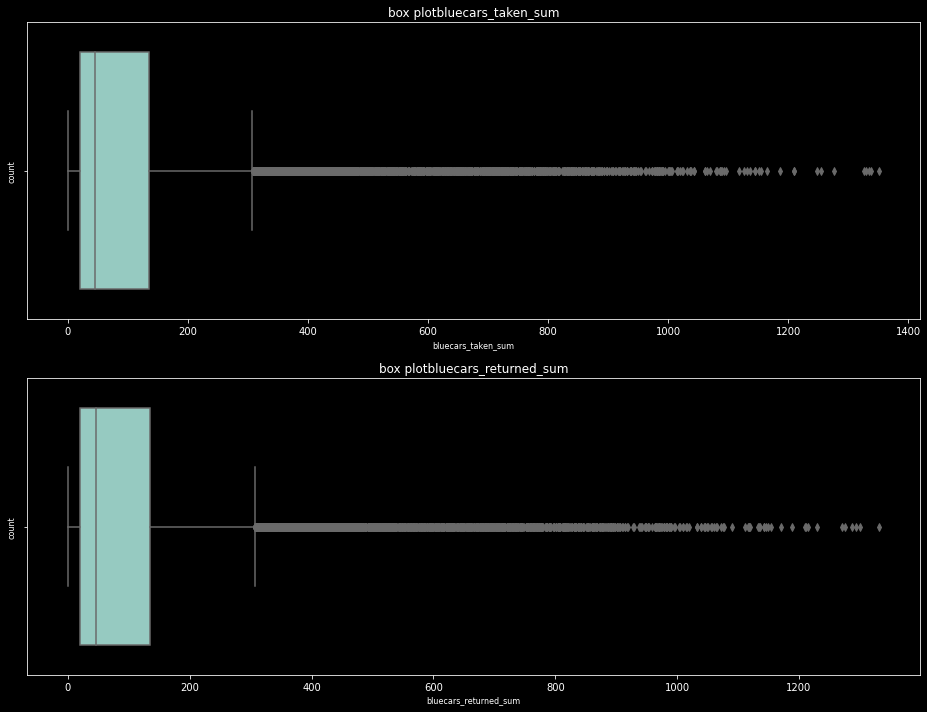

In [0]:
#checking for outliers using box plot
col_names= [ 'bluecars_taken_sum','bluecars_returned_sum']
fig, ax=plt.subplots(len(col_names), figsize=(16,12))
for i, col_val in enumerate(col_names):
  sns.boxplot(Autolib[col_val], ax=ax[i])
  ax[i].set_title ('box plot'+col_val, fontsize= 12)
  ax[i].set_xlabel(col_val, fontsize= 8)
  ax[i].set_ylabel('count', fontsize= 8)
plt.show()

In the above boxplot,there are so many outliers so we will not drop them rather we will continue to use them in our analysis.

In [0]:
# saving our cleaned dataset
Autolib.to_csv("./clean_Autolib.csv")

                 **Univariate Analysis**   

In [0]:
                        categorical variables
# reading the cleaned dataset
autolib = pd.read_csv("/content/clean_Autolib.csv", sep=',', index_col=0)

In [0]:
autolib.shape

(16085, 9)

In [0]:
#Creating a frequency table
f_table = ('data_points', 'bluecars_taken_sum', 'bluecars_returned_sum','slots_freed_sum', 'slots_taken_sum')
for col in f_table:
    print(autolib[col].value_counts())
    print("\n")

1440    10113
1439     2579
1438      723
1437      411
1425      207
1434      207
1417      206
1411      104
1398      104
1174      104
1429      104
1436      104
1435      104
1203      103
1380      103
1364      103
1420      103
1389      103
1318      103
1320      103
1377      102
1396       98
1370       94
Name: data_points, dtype: int64


12      261
14      253
9       247
11      246
13      238
       ... 
833       1
825       1
809       1
801       1
1335      1
Name: bluecars_taken_sum, Length: 932, dtype: int64


13      260
12      254
10      249
9       243
11      242
       ... 
556       1
588       1
604       1
628       1
1287      1
Name: bluecars_returned_sum, Length: 929, dtype: int64


0      10227
1        540
2        487
3        390
4        326
       ...  
242        1
305        1
289        1
360        1
339        1
Name: slots_freed_sum, Length: 297, dtype: int64


0      10235
1        545
2        476
3        405
4        309
       ...

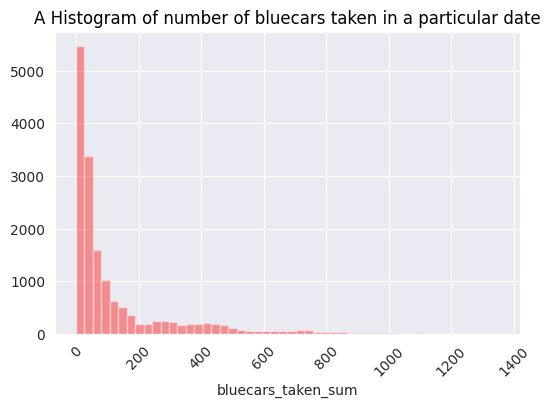

In [0]:
#histogram plot show the number of bluecars
plt.figure(dpi = 100)
sns.set_style("darkgrid")
sns.distplot(autolib["bluecars_taken_sum"], kde = False, color = 'red')
plt.title("A Histogram of number of bluecars taken in a particular date", color = 'black')
plt.xticks(rotation = 45)
plt.show()

The hist above shows that the blue cars taken distribution is skewed to the right.This is because the frequency moves to the right.The mean is less than the mode.This is called negative skweness.



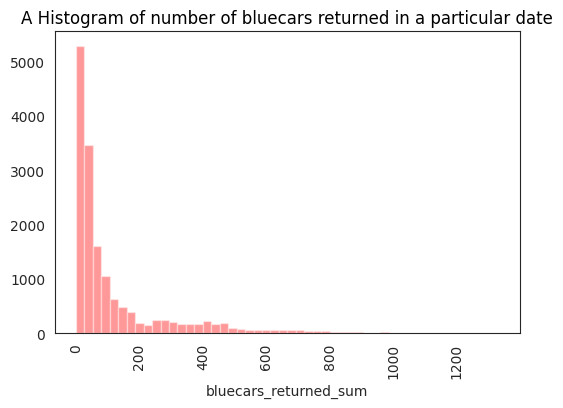

In [0]:
#histogram plot show the number of bluecars returned
plt.figure(dpi = 100)
sns.set_style("white")
sns.distplot(autolib["bluecars_returned_sum"], kde = False, color = 'red')
plt.title("A Histogram of number of bluecars returned in a particular date", color = 'black')
plt.xticks(rotation = 90)
plt.show()

The histogram above shows that the blue cars returned distribution is skewed to the right.The mean is less than the mode..This is called negative skweness.



In [0]:
# Converting the day of week from from numericals to strings for plotting
#
autolib['day_of_week'] = autolib.day_of_week.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'})


**Central tendancy Measures**

In [0]:
# Calculate and Display the mean by column

cols = [ 'bluecars_taken_sum', 'bluecars_returned_sum','slots_freed_sum','data_points', 
       'slots_taken_sum']



for column in cols:
  print("\n")
  print('The average ' + column + ' is : ' + str(autolib[column].mean()))



The average bluecars_taken_sum is : 124.1498290332608


The average bluecars_returned_sum is : 124.13826546471869


The average slots_freed_sum is : 22.559962698165993


The average data_points is : 19.947653092943735


The average slots_taken_sum is : 22.5710910786447


The mean refers to the average value of a group of numbers. Add up all the figures, divide by the number of values, and that is the average.

Median

In [0]:
cols = [ 'bluecars_taken_sum', 'bluecars_returned_sum','slots_freed_sum','data_points', 
       'slots_taken_sum']



for column in cols:
  print("\n")
  print('The median ' + column + ' is : ' + str(autolib[column].median()))



The median bluecars_taken_sum is : 46.0


The median bluecars_returned_sum is : 46.0


The median slots_freed_sum is : 0.0


The median data_points is : 1440.0


The median slots_taken_sum is : 0.0


The median of a distribution with a discrete random variable depends on whether the number of terms in the distribution is even or odd

Mode

In [0]:
cols = [ 'bluecars_taken_sum', 'bluecars_returned_sum','slots_freed_sum','data_points', 
       'slots_taken_sum']



for column in cols:
  print("\n")
  print('The mode ' + column + ' is : ' + str(autolib[column].mode()))



The mode bluecars_taken_sum is : 0    12
dtype: int64


The mode bluecars_returned_sum is : 0    13
dtype: int64


The mode slots_freed_sum is : 0    0
dtype: int64


The mode data_points is : 0    1440
dtype: int64


The mode slots_taken_sum is : 0    0
dtype: int64


Mode is the most frequent or common score in the distribution, and is the point or value of Χ that corresponds to the highest point on the distribution

**Measures of Spread**

Standard deviation
provides insight into how much variation there is within a group of values. It measures the deviation (difference) from the group's mean (average)

In [0]:
cols = [ 'bluecars_taken_sum', 'bluecars_returned_sum','slots_freed_sum','data_points', 
       'slots_taken_sum']



for column in cols:
  print("\n")
  print('The standard deviation of ' + column + ' is : ' + str(autolib[column].std()))



The standard deviation of bluecars_taken_sum is : 185.42657876727893


The standard deviation of bluecars_returned_sum is : 185.50153480148427


The standard deviation of slots_freed_sum is : 52.12026333757879


The standard deviation of data_points is : 33.21205013556443


The standard deviation of slots_taken_sum is : 52.146029870452566


Variance

In [0]:
cols = [ 'bluecars_taken_sum', 'bluecars_returned_sum','slots_freed_sum','data_points', 
       'slots_taken_sum']



for column in cols:
  print("\n")
  print('The variance ' + column + ' is : ' + str(autolib[column].var()))



The variance bluecars_taken_sum is : 34383.01611333789


The variance bluecars_returned_sum is : 34410.819413706275


The variance slots_freed_sum is : 2716.52185037856


The variance data_points is : 1103.0402742072456


The variance slots_taken_sum is : 2719.2084312501315


The variance is a measure in squared units and has little meaning with respect to the data.

**Measures of shape**
For distributions summarizing data from continuous measurement scales, statistics can be used to describe how the distribution rises and drops.



In [0]:
cols = [ 'bluecars_taken_sum', 'bluecars_returned_sum','slots_freed_sum','data_points', 
       'slots_taken_sum']



for column in cols:
  print("\n")
  print('The skewness ' + column + ' is : ' + str(autolib[column].skew()))



The skewness bluecars_taken_sum is : 2.4063548974959086


The skewness bluecars_returned_sum is : 2.412084978838923


The skewness slots_freed_sum is : 2.5974057870090994


The skewness data_points is : -5.742776211517434


The skewness slots_taken_sum is : 2.5969043474634987


**Bivariate Analysis**

In [0]:
# convert categorical data to Numerical variables
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
autolib['data_points'] = en.fit_transform(autolib['data_points'])
autolib['bluecars_taken_sum'] = en.fit_transform(autolib['bluecars_taken_sum'])
autolib['bluecars_returned_sum'] = en.fit_transform(autolib['bluecars_returned_sum'])
autolib['slots_freed_sum'] = en.fit_transform(autolib['slots_freed_sum'])
autolib['slots_taken_sum'] = en.fit_transform(autolib['slots_taken_sum'])
autolib

,postal_code,date,data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,22,NaN,weekday,110,103,22,20
1,75001,1/2/2018,20,NaN,weekday,98,94,23,22
2,75001,1/3/2018,21,NaN,weekday,138,139,27,27
3,75001,1/4/2018,3,NaN,weekday,104,104,25,21
4,75001,1/5/2018,22,NaN,weekday,114,117,18,20
...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,22,NaN,weekday,15,10,0,0
16081,95880,6/16/2018,22,NaN,weekend,19,19,0,0
16082,95880,6/17/2018,22,NaN,weekend,33,35,0,0
16083,95880,6/18/2018,22,NaN,weekday,11,14,0,0


In [0]:
# Describing our numeric variables
numeric_col = ['bluecars_taken_sum', 'data_points', 'slots_taken_sum']
autolib[numeric_col].describe()

,bluecars_taken_sum,data_points,slots_taken_sum
count,16085.000000,16085.000000,16085.000000
mean,124.149829,19.947653,22.571091
std,178.061006,4.656157,51.840756
min,0.000000,0.000000,0.000000
25%,20.000000,21.000000,0.000000
50%,46.000000,22.000000,0.000000
75%,135.000000,22.000000,5.000000
max,931.000000,22.000000,300.000000


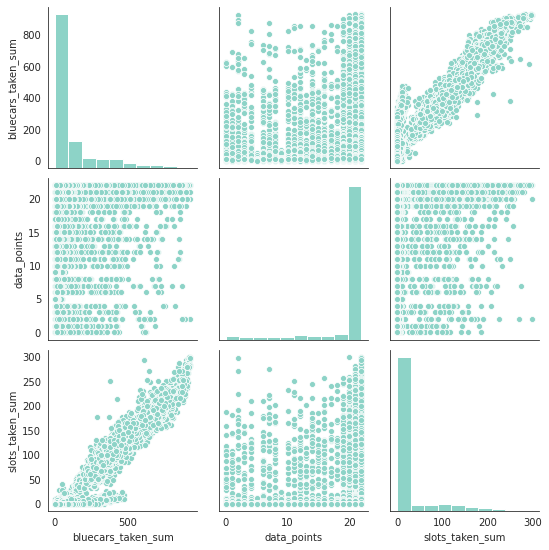

In [0]:
sns.pairplot(autolib[numeric_col])

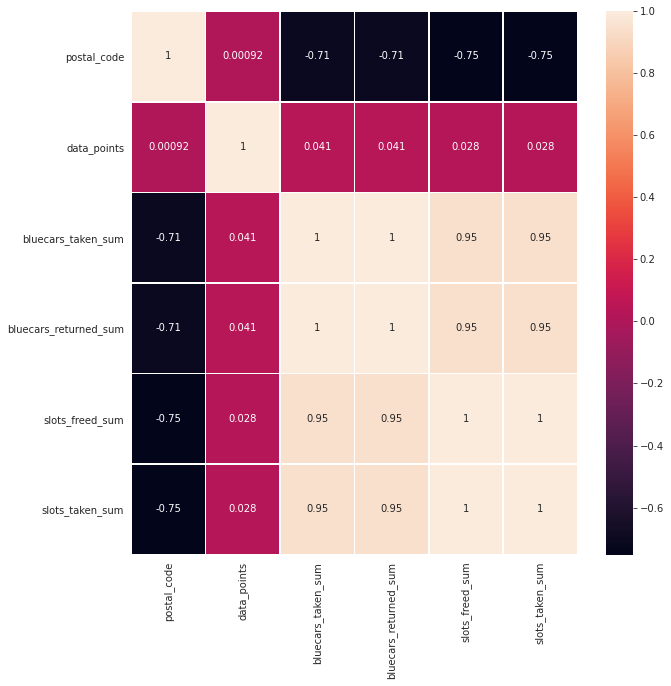

In [0]:
# plotting heatmap to show how our numeric variables correlate
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(autolib.corr(), annot= True, linewidths= .5, ax=ax)


In [0]:
#calculating the correlations of the bluecars taken and the slot_ taken sum
pearson_coeff = autolib["bluecars_taken_sum"].corr(autolib["slots_taken_sum"], method="pearson")
print(f"Correlation between blue cars taken and slots taken sum is {pearson_coeff}")

Correlation between blue cars taken and slots taken sum is 0.9460742838193665


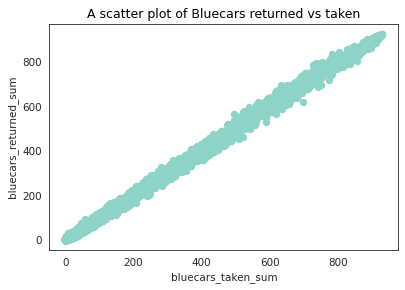

In [0]:
# Specifying the chart size

plt.figure(dpi = 75)

# plotting our scatterplot using matplotlib
plt.scatter(autolib['bluecars_taken_sum'], autolib['bluecars_returned_sum'])

# Giving the scatterplot a title
plt.title('A scatter plot of Bluecars returned vs taken', color = 'black')

# Labelling the x axis
plt.xlabel('bluecars_taken_sum')

# Labelling the y axis
plt.ylabel('bluecars_returned_sum')

# We then display our scatterplot 
plt.show()

The scatter plot shows that there is positive correlation. An increase in bluecars returned increases the rate at which bluecars are taken from the different postal stations.

#Simple Random sampling


In [0]:
#This is a sample is a subset of individuals chosen from a larger set.
#Each individual is chosen randomly and entirely by chance, 
# creating a new dataframe containing our simple random sample 
# Let us make our sample size = 5000
# The sample will be selected without replacement

#Original data shape
print(autolib.shape)
print('****************')
sample_data = autolib.sample(n = 5000, replace = 'False')
#New sample data shape
print(sample_data.shape)

(16085, 9)
****************
(5000, 9)


**A hypothesis** is an assumption about an unknown fact.

**Null hypothesis.**
The null hypothesis, denoted by Ho, is usually the hypothesis that sample observations result purely from chance.

**Alternative hypothesis**.

The alternative hypothesis, denoted by H1 or Ha, is the hypothesis that sample observations are influenced by some non-random cause.

**The P-value **

The probability of observing a test statistic as extreme as S, assuming the null hypothesis is true. If the P-value is less than the significance level, we reject the null hypothesis.

**Hypothesis Testing**

In [0]:

hypothesis_sample = sample_data.sample(n = 2, replace = False)
hypothesis_sample

,postal_code,date,data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
3020,75020,3/1/2018,8,NaN,weekday,421,421,115,112
14654,94300,5/23/2018,0,NaN,weekday,59,56,0,0


In [0]:
Ho = The postal code chosen represents that there is no difference in the means of blue cars taken in postal code  75020 and 94300 

H1 != The postal code chosen represents that there is a difference in the means of blue cars taken in postal code 75020 and 94300 .

First, create a dataframe with postal code 75020 and 94300

In [0]:
df = sample_data[sample_data['postal_code'] == 75020]
df.head()

,postal_code,date,data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
3106,75020,6/6/2018,22,NaN,weekday,443,445,156,151
2973,75020,1/10/2018,22,NaN,weekday,436,412,111,106
3050,75020,3/31/2018,22,NaN,weekend,559,551,150,144
3058,75020,4/8/2018,22,NaN,weekend,592,635,211,213
3101,75020,6/1/2018,22,NaN,weekday,513,482,153,154


In [0]:
df1 = sample_data[sample_data['postal_code'] == 94300]
df1.head()

,postal_code,date,data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
14586,94300,3/5/2018,22,NaN,weekday,54,60,0,0
14548,94300,1/23/2018,21,NaN,weekday,44,42,0,0
14576,94300,2/20/2018,14,NaN,weekday,36,39,0,0
14611,94300,3/30/2018,16,NaN,weekday,42,51,0,0
14664,94300,6/2/2018,22,NaN,weekend,150,146,0,0


In [0]:
#Calculate z-test
# Assume level of significance = 0.5

# Calculating the test statistic

ztest , pval1 = stests.ztest(x1 = df['bluecars_taken_sum'], x2 = df1['bluecars_taken_sum'], value=0, alternative='two-sided')

print(float(pval1))

if pval1 < 0.05:
    print("Failed to accept null hypothesis")
else:
    print("Failed to reject null hypothesis")

1.0105299905038005e-106
Failed to accept null hypothesis



# **Summary and Conclusions**
According to our hypothesis test on the p-value is 1.01529. A p-value higher than 0.05 (> 0.05) is not statistically significant and indicates weak evidence against the null hypothesis.

Therefore, we fail to accept the null hypothesis.